Observations: Median sold price Vs Median rent price : All years have clear relationship as the price go up rent go up.
Median sold price vs no of rent listing: No of rent listings are higher for lesser median sold price and vice versa.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#load csv into dataframe
csv_2019  = "Resources/yearly_data_clean_2019.csv"
csv_2020  = "Resources/yearly_data_clean_2020.csv"
csv_2021  = "Resources/yearly_data_clean_2021.csv"
df_realestate_2019 = pd.read_csv(csv_2019)
df_realestate_2020 = pd.read_csv(csv_2020)
df_realestate_2021 = pd.read_csv(csv_2021)
df_realestate_2019.head()

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,990000.0,57.0,2425000.0,370000.0,661000.0,808000.0,1445000.0,...,1150000.0,71.0,2573000.0,115000.0,50.0,26.0,645.0,150.0,1250.0,400.0
1,3040,Aberfeldie,647,1368000.0,244.0,8000000.0,297000.0,480000.0,876000.0,1820000.0,...,1300000.0,285.0,8000000.0,280000.0,182.0,94.0,525.0,373.0,1400.0,250.0
2,3042,Airport West,757,953000.0,74.0,1500000.0,480000.0,610000.0,800000.0,1100000.0,...,953000.0,98.0,1470000.0,500000.0,62.0,24.0,475.0,125.0,1350.0,260.0
3,3021,Albanvale,787,596000.0,348.0,1400000.0,300000.0,410000.0,510000.0,650000.0,...,599000.0,532.0,2500000.0,60000.0,132.0,41.0,360.0,521.0,1647.0,190.0
4,3206,Albert Park,797,2575000.0,55.0,8600000.0,735000.0,1353000.0,1990000.0,3650000.0,...,2425000.0,52.0,13000000.0,315000.0,37.0,17.0,840.0,95.0,2000.0,350.0


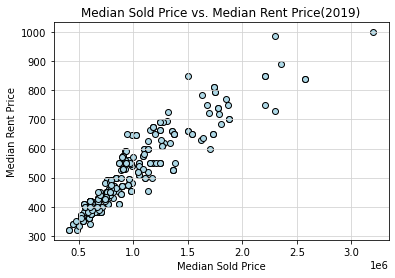

In [3]:
# Define x, y values and lables
title = "Median Sold Price vs. Median Rent Price(2019)"
x_values = df_realestate_2019['medianSoldPrice'].astype('float')
y_values = df_realestate_2019['medianRentListingPrice'].astype('float')
x_label = "Median Sold Price"
y_label = "Median Rent Price"

# Scatter plot 
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# Axis and title
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
# formatting
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#plt.savefig(f"output_data/{title}.png")
plt.show()

the correlation between Median Sold Price and Median Rent Price is 0.92
The R Squared: 0.8489568101467605


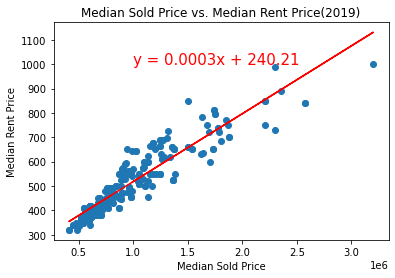

In [4]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000000,1000),fontsize=15,color="red")

# Label plot
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print r square value
print(f"the correlation between {x_label} and {y_label} is {round(correlation[0],2)}")
print(f"The R Squared: {rvalue**2}")

plt.savefig(f"Savefig/{title}.png")
# Show plot
plt.show()

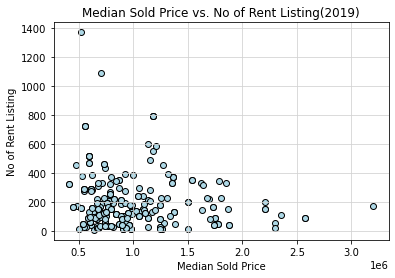

In [7]:
# Define x, y values and lables
title = "Median Sold Price vs. No of Rent Listing(2019)"
x_values = df_realestate_2019['medianSoldPrice'].astype('float')
y_values = df_realestate_2019['numberRentListing'].astype('float')
x_label = "Median Sold Price"
y_label = "No of Rent Listing"

# Scatter plot 
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# Axis and title
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
# formatting
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#plt.savefig(f"output_data/{title}.png")
plt.show()

the correlation between Median Sold Price and No of Rent Listing is -0.08
The R Squared: 0.005952142562970703


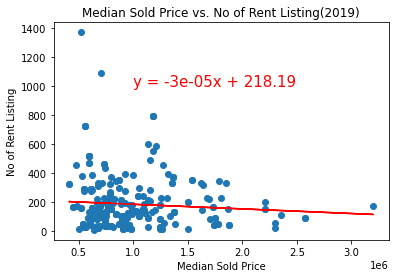

In [12]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000000,1000),fontsize=15,color="red")

# Label plot
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print r square value
print(f"the correlation between {x_label} and {y_label} is {round(correlation[0],2)}")
print(f"The R Squared: {rvalue**2}")

plt.savefig(f"Savefig/{title}.png")
# Show plot
plt.show()

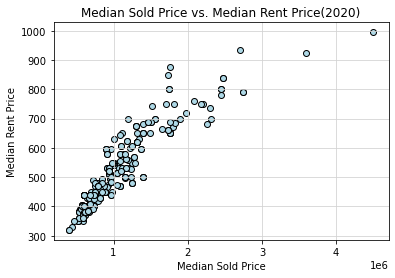

In [13]:
# Define x, y values and lables
title = "Median Sold Price vs. Median Rent Price(2020)"
x_values = df_realestate_2020['medianSoldPrice'].astype('float')
y_values = df_realestate_2020['medianRentListingPrice'].astype('float')
x_label = "Median Sold Price"
y_label = "Median Rent Price"

# Scatter plot 
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# Axis and title
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
# formatting
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#plt.savefig(f"output_data/{title}.png")
plt.show()

the correlation between Median Sold Price and Median Rent Price is 0.91
The R Squared: 0.8277099837440647


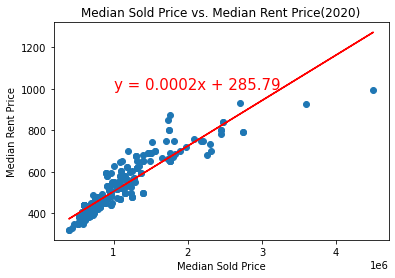

In [14]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000000,1000),fontsize=15,color="red")

# Label plot
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print r square value
print(f"the correlation between {x_label} and {y_label} is {round(correlation[0],2)}")
print(f"The R Squared: {rvalue**2}")

plt.savefig(f"Savefig/{title}.png")
# Show plot
plt.show()

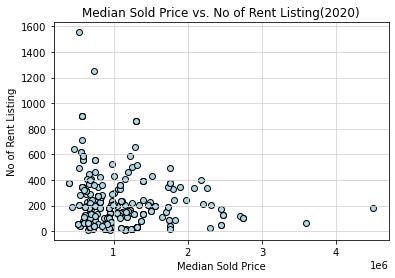

In [15]:
# Define x, y values and lables
title = "Median Sold Price vs. No of Rent Listing(2020)"
x_values = df_realestate_2020['medianSoldPrice'].astype('float')
y_values = df_realestate_2020['numberRentListing'].astype('float')
x_label = "Median Sold Price"
y_label = "No of Rent Listing"

# Scatter plot 
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# Axis and title
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
# formatting
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#plt.savefig(f"output_data/{title}.png")
plt.show()

the correlation between Median Sold Price and No of Rent Listing is -0.09
The R Squared: 0.008906599455448742


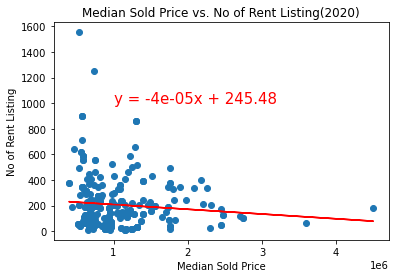

In [17]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000000,1000),fontsize=15,color="red")

# Label plot
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print r square value
print(f"the correlation between {x_label} and {y_label} is {round(correlation[0],2)}")
print(f"The R Squared: {rvalue**2}")

plt.savefig(f"Savefig/{title}.png")
# Show plot
plt.show()

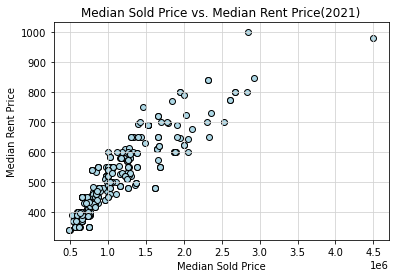

In [18]:
# Define x, y values and lables
title = "Median Sold Price vs. Median Rent Price(2021)"
x_values = df_realestate_2021['medianSoldPrice'].astype('float')
y_values = df_realestate_2021['medianRentListingPrice'].astype('float')
x_label = "Median Sold Price"
y_label = "Median Rent Price"

# Scatter plot 
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# Axis and title
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
# formatting
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#plt.savefig(f"output_data/{title}.png")
plt.show()

the correlation between Median Sold Price and Median Rent Price is 0.89
The R Squared: 0.7963149218997483


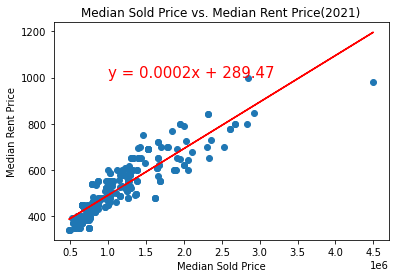

In [19]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000000,1000),fontsize=15,color="red")

# Label plot
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print r square value
print(f"the correlation between {x_label} and {y_label} is {round(correlation[0],2)}")
print(f"The R Squared: {rvalue**2}")

plt.savefig(f"Savefig/{title}.png")
# Show plot
plt.show()

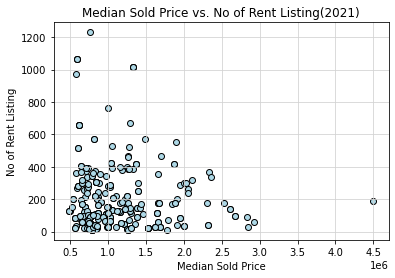

In [20]:
# Define x, y values and lables
title = "Median Sold Price vs. No of Rent Listing(2021)"
x_values = df_realestate_2021['medianSoldPrice'].astype('float')
y_values = df_realestate_2021['numberRentListing'].astype('float')
x_label = "Median Sold Price"
y_label = "No of Rent Listing"

# Scatter plot 
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# Axis and title
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
# formatting
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#plt.savefig(f"output_data/{title}.png")
plt.show()

the correlation between Median Sold Price and No of Rent Listing is -0.08
The R Squared: 0.006385111076991047


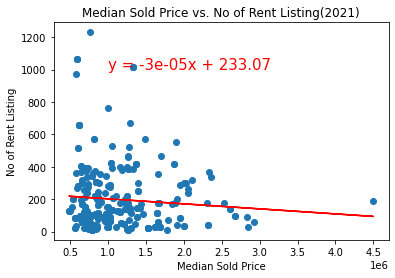

In [21]:
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000000,1000),fontsize=15,color="red")

# Label plot
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Print r square value
print(f"the correlation between {x_label} and {y_label} is {round(correlation[0],2)}")
print(f"The R Squared: {rvalue**2}")

plt.savefig(f"Savefig/{title}.png")
# Show plot
plt.show()